# Viewing directory files

In [1]:
import os 
os.listdir()

['.gitignore',
 '.ipynb_checkpoints',
 'breast_cancer.csv',
 'breast_cancer_master',
 'breast_cancer_master.csv',
 'breast_cancer_prediction_model.ipynb',
 'breat_cancer_update.ipynb',
 'SMOTEENN PREDICTION MODEL.ipynb',
 'Untitled.ipynb']

# Importing breast cancer dataset

In [2]:
import pandas as pd 
df = pd.read_csv('breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# exploratory data analysis (EDA)

In [66]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [3]:
row , col = df.shape
print(f'Number of datapoint == {row} || Colums present == {col} ')

Number of datapoint == 569 || Colums present == 33 


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [69]:
# preproceing the prediction classess (m=1 , b=0)
m , b = df.diagnosis.value_counts()
print(f' M class is {m} size')
print(f' B class is {b} size')

 M class is 357 size
 B class is 212 size


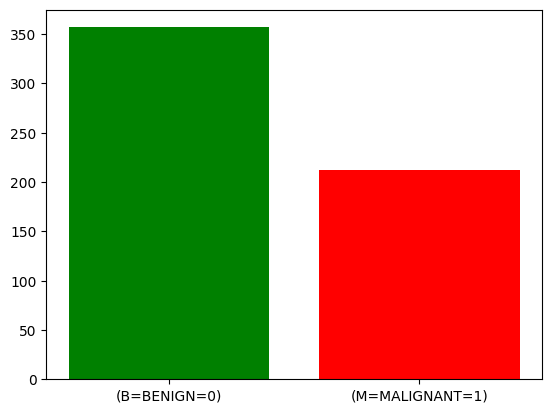

In [70]:
import matplotlib.pyplot as plt
m_class_size  = len(df[df.diagnosis == 'M'])
b_class_size = len(df[df.diagnosis == 'B'])
bar_x =  ['(B=BENIGN=0)' , '(M=MALIGNANT=1)']
bar_y = [b_class_size, m_class_size]
plt.bar(bar_x , bar_y, color=['green', 'red'])
plt.show()

In [71]:
data  = df[['diagnosis', 'radius_mean']]
# plt.scatter(df.radius_mean, df.diagnosis, color=['red', 'green'])

(array([ 19.,  89., 168.,  73.,   8.]),
 array([ 6.981 ,  9.1548, 11.3286, 13.5024, 15.6762, 17.85  ]),
 <BarContainer object of 5 artists>)

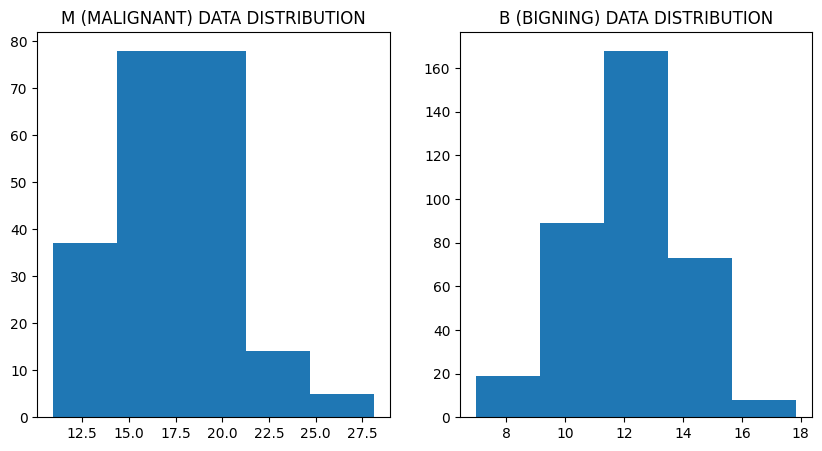

In [72]:
m_class = df['radius_mean'][df.diagnosis == 'M']
b_class = df['radius_mean'][df.diagnosis == 'B']

fig, axes = plt.subplots(1,2,figsize=(10,5))

# plt.title('M (MALIGNANT) DATA DISTRIBUTION')
axes[0].set_title('M (MALIGNANT) DATA DISTRIBUTION')
axes[0].hist(m_class, bins=5)


# plt.title('B (BIGNING) DATA DISTRIBUTION')
axes[1].set_title('B (BIGNING) DATA DISTRIBUTION')
axes[1].hist(b_class, bins=5)

(array([ 19.,  89., 168.,  73.,   8.]),
 array([ 6.981 ,  9.1548, 11.3286, 13.5024, 15.6762, 17.85  ]),
 <BarContainer object of 5 artists>)

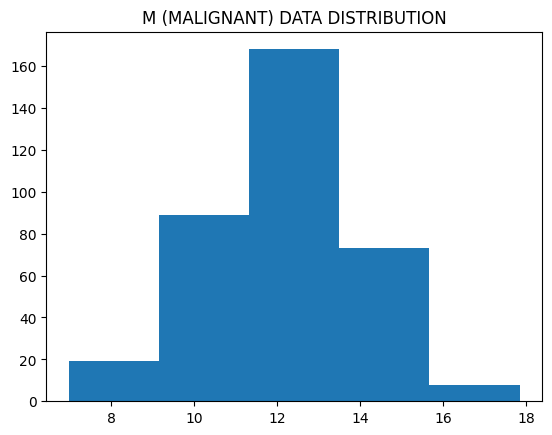

In [73]:
m_class = df['radius_mean'][df.diagnosis == 'B']
plt.title('M (MALIGNANT) DATA DISTRIBUTION')
plt.hist(m_class, bins=5)

# data cleaning and preprocing

In [74]:
# removing unused colums ('id' and 'unnamed: 32') both are none relevant to the prediction

In [75]:
new_df = df.drop(columns=[df.columns[0] ,df.columns[-1]], axis=1)
new_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [76]:
# extracting independent variable and dependent variable thus, x and y b
# The diagnosis of breast tissues (M = malignant, B = benign)

In [77]:
y = new_df['diagnosis']
# new_df = new_df.drop(columns='diagnosis', axis=1 , inplace=True)
y.unique()   # M for 

array(['M', 'B'], dtype=object)

In [78]:
X = new_df.drop(columns='diagnosis', axis=1)
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [79]:
##             defination of the diagnosis classes 
#                  MALIGNANT
# Breast cancer is a malignant tumor that grows in or 
# around the breast tissue, mainly in the milk ducts and glands.
# A tumor usually starts as a lump or calcium deposit that develops 
# as a result of abnormal cell growth. Most breast lumps are benign but some can 
# be premalignant (may become cancer) or malignant.
#                 BENIGN
# Benign (non-cancerous) breast conditions are very common,
# and most women have them. In fact, most breast changes are benign.
# Unlike breast cancers, benign breast conditions are not 
# life-threatening. But some are linked with 
# a higher risk of getting breast cancer later on.



In [80]:
import numpy as np
np.array(y)

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

# data transformation

In [81]:
# 
# check if datapoint count of each datapoint
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_encode = lb.fit_transform(y)
y_encode # m = 1 , b = 0

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [82]:
# y_encode = x_encode.reshape(-1, 1)
# y_encode.shape

In [83]:
y_encode.shape

(569,)

# data splitting (into training and testing set)

In [84]:
from sklearn import model_selection 
X_train , X_test , y_train , y_test = \
model_selection.train_test_split(X, y_encode,  test_size=.15)
print(f'X train size {X_train.shape}')
print(f'X test size {X_test.shape}')
print(f'y train size {y_train.shape}')
print(f'y test size {y_test.shape}')

X train size (483, 30)
X test size (86, 30)
y train size (483,)
y test size (86,)


# machine learning model (svm , random forest and Decision tree) 

In [85]:
from sklearn import svm
from sklearn import linear_model 
from sklearn import tree
from sklearn import ensemble

In [86]:
def prediction_model(model_name, model , xtrain , ytrain, xtest , ytest):
    clf = model.fit(X_train, y_train)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(f'Prediction Score from {model_name} is : {score}')
    return model, score    

In [87]:
svm_model , s = prediction_model('SVM',  svm.SVC() , X_train , y_train, X_test , y_test)
# rd_model , s = prediction_model('Random Forest',  ensemble.RandomForestClassifier() , X_train , y_train, X_test , y_test)
# dt_model , s = prediction_model('Decision Tree',  tree.DecisionTreeClassifier() , X_train , y_train, X_test , y_test)
# _ , s = prediction_mode('Logistic Regression',  linear_model.LogisticRegression(max_iter=50) , X_train , y_train, X_test , y_test)

Prediction Score from SVM is : 0.9069767441860465


In [88]:
# model evaluation 
from sklearn import model_selection
from sklearn import metrics
import seaborn as sn

# # svm
# svm_predict = svm_model.predict(X_test)
# report = metrics.classification_report(y_test, svm_predict)
# print(report)

def evaluation_report(model_name, model , xtrain , ytrain, xtest , ytest):
#     perform prediction
    m , s = prediction_model(model_name, model , xtrain , ytrain, xtest , ytest)
    predictions = m.predict(xtest)
    report = metrics.classification_report(y_test, predictions)
    cm = metrics.confusion_matrix(y_test, predictions)
    print(report)
    print(cm)
    return report, cm 


In [89]:
# training the random forest classifier

Prediction Score from Random Forest is : 0.8953488372093024
              precision    recall  f1-score   support

           0       0.92      0.91      0.92        54
           1       0.85      0.88      0.86        32

    accuracy                           0.90        86
   macro avg       0.89      0.89      0.89        86
weighted avg       0.90      0.90      0.90        86

[[49  5]
 [ 4 28]]


<Axes: title={'center': 'Random Forest Classification report'}>

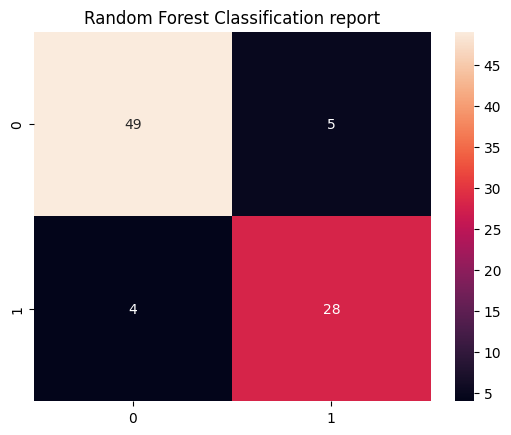

In [90]:
r, c = evaluation_report('Random Forest',  ensemble.RandomForestClassifier() , \
                         X_train , y_train, X_test , y_test)
plt.title('Random Forest Classification report')
sn.heatmap(c, annot=True,  fmt='d')

Prediction Score from SVM is : 0.9069767441860465
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        54
           1       1.00      0.75      0.86        32

    accuracy                           0.91        86
   macro avg       0.94      0.88      0.89        86
weighted avg       0.92      0.91      0.90        86

[[54  0]
 [ 8 24]]


<Axes: title={'center': 'Support Vector Classification report'}>

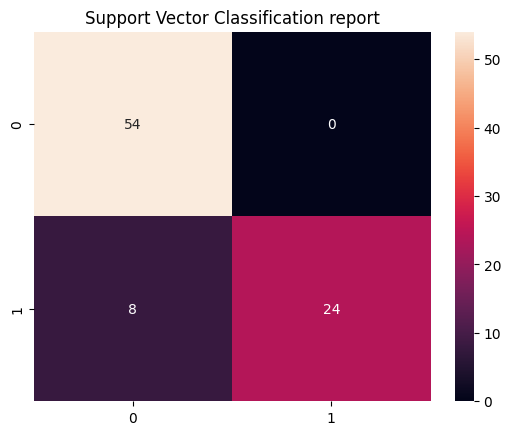

In [91]:
r, c = evaluation_report('SVM',  svm.SVC() , X_train , y_train, X_test , y_test)
plt.title('Support Vector Classification report')
sn.heatmap(c, annot=True,  fmt='d')

Prediction Score from Decision Tree is : 0.9069767441860465
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        54
           1       0.85      0.91      0.88        32

    accuracy                           0.91        86
   macro avg       0.90      0.91      0.90        86
weighted avg       0.91      0.91      0.91        86

[[49  5]
 [ 3 29]]


<Axes: title={'center': 'Decision Tree Classification Report'}>

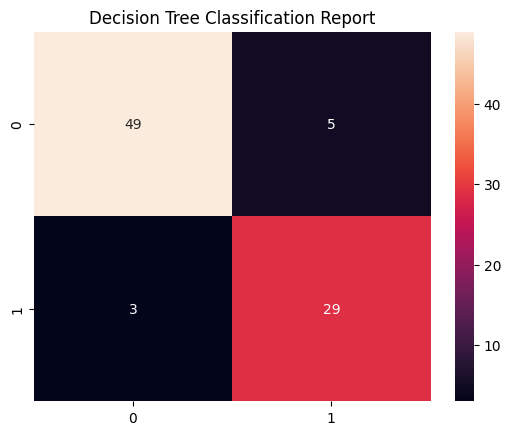

In [92]:
r, c = evaluation_report('Decision Tree',  tree.DecisionTreeClassifier() , X_train , y_train, X_test , y_test)
plt.title('Decision Tree Classification Report')
sn.heatmap(c, annot=True,  fmt='d')

In [31]:
# actual input feature without data normalization... 
# X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [63]:
#  DATA SCALLING 

# from sklearn.preprocessing import MinMaxScaler
# scaller = MinMaxScaler()

# for col in X.columns:
#     X[col] = scaller.fit_transform(X[[col]])
    
# x_scalled = X


In [33]:
x_scalled

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


# Data balaning (using SMOTE & ENN )

In [96]:
# present of data imbalance... 
y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [38]:
# SMOTE (synthetic minority oversampling technique) is one of the most 
# commonly used oversampling methods to solve the imbalance problem
#                             &
# ENN (Edited Nearest Neighbours)
# ENN method works by finding the K-nearest neighbor of each observation first, then check whether
# the majority class from the observation's
# k-nearest neighbor is the same as the observation's class or not

In [39]:
# from imblearn import over_sampling
# smote = over_sampling.SVMSMOTE(sampling_strategy='minority')
# x_b , y_b = smote.fit_resample(x_scalled, y_encode)

### SMOTE-ENN

In [164]:
from imblearn.combine import SMOTEENN 

sme = SMOTEENN(random_state=42)
x_b , y_b = sme.fit_resample(x_scalled, y_encode)

print(f' Class M(0) = : {len(y_b[y_b == 0])}')
print(f' Class B(1) = : {len(y_b[y_b == 1])}')

 Class M(0) = : 324
 Class B(1) = : 338


In [165]:
from sklearn import model_selection 
X_train , X_test , y_train , y_test = \
model_selection.train_test_split(x_b , y_b,  test_size=.15) 


In [163]:
# x_scalled

In [166]:
_ , s = prediction_model('SVM',  svm.SVC() , X_train , y_train, X_test , y_test)
rf , s = prediction_model('Random Forest',  ensemble.RandomForestClassifier() , X_train , y_train, X_test , y_test)
dt , s = prediction_model('Decision Tree',  tree.DecisionTreeClassifier() , X_train , y_train, X_test , y_test)

Prediction Score from SVM is : 1.0
Prediction Score from Random Forest is : 0.99
Prediction Score from Decision Tree is : 0.98


In [167]:
from sklearn import ensemble
# Random forest classificatio model

# initializing random forest.... 
random_forest = ensemble.RandomForestClassifier()
# training model using training dataset
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [131]:
y_test

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1])

In [168]:
# model evaluation
from sklearn import metrics

# make prediction for 
prediction = random_forest.predict(X_test)
# accuracy score metrics
acc_score = metrics.accuracy_score(y_test, prediction)
print(f'Random Forest Accuracy  Score : {acc_score}')
# precision score metrics
pre_score = metrics.precision_score(y_test, prediction)
print(f'Random Forest Precision  Score : {pre_score}')
# recall score metrics
re_score = metrics.recall_score(y_test, prediction)
print(f'Random Forest Recall  Score : {re_score}')
# F1 score metrics
f1_score = metrics.f1_score(y_test, prediction)
print(f'Random Forest F1  Score : {f1_score}')

Random Forest Accuracy  Score : 0.99
Random Forest Precision  Score : 0.9833333333333333
Random Forest Recall  Score : 1.0
Random Forest F1  Score : 0.9915966386554621


In [169]:
# classification report
class_report = metrics.classification_report(y_test, prediction)

print('     ======== RANDOM FOREST CLASSIFICATION REPORT =========')
print()
print(class_report)

     ======== RANDOM FOREST CLASSIFICATION REPORT =========

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.98      1.00      0.99        59

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



          ===> (M = malignant (1), B = benign (0)) <=== 


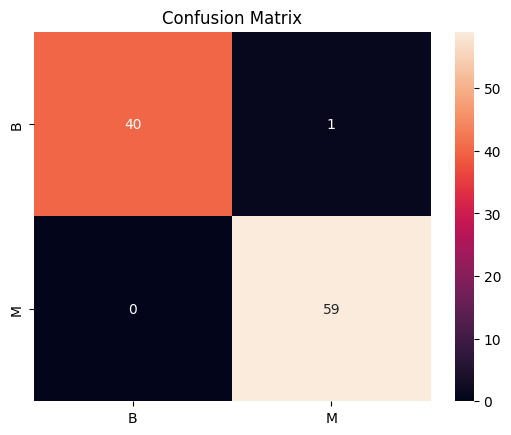

In [170]:
import seaborn as sn
# getting the confusion matrix metrics 
cm = metrics.confusion_matrix(y_test, prediction)
print('          ===> (M = malignant (1), B = benign (0)) <=== ')
sn.heatmap(cm, xticklabels=['B','M' ], yticklabels=['B', 'M'], annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

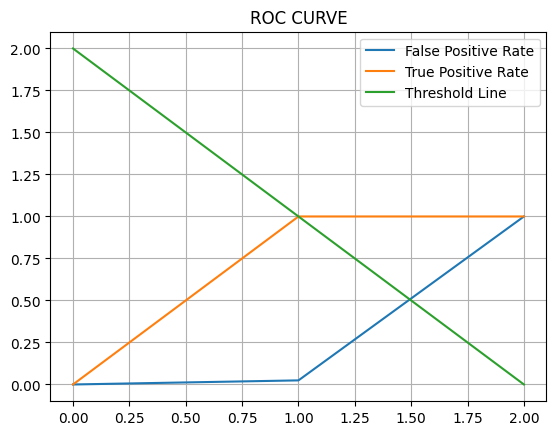

In [171]:
fpr, tpr, threshold = metrics.roc_curve(y_test, prediction)
plt.plot(fpr, label='False Positive Rate')
plt.plot(tpr , label='True Positive Rate')
plt.plot(threshold, label='Threshold Line')
plt.title('ROC CURVE')
plt.grid()
plt.legend()
plt.show()

# Data balaning (using SMOTE)

In [172]:
from imblearn.over_sampling import SMOTE, ADASYN, SVMSMOTE
from sklearn import model_selection 



### SMOTE

In [174]:
smote = SMOTE()
sm_x, sm_y = smote.fit_resample(x_scalled, y_encode)

print(f' Class M(0) = : {len(sm_y[sm_y == 0])}')
print(f' Class B(1) = : {len(sm_y[sm_y == 1])}')

 Class M(0) = : 357
 Class B(1) = : 357


In [175]:
X_train , X_test , y_train , y_test = \
model_selection.train_test_split(sm_x , sm_y,  test_size=.15) 

In [176]:
# initializing random forest.... 
random_forest = ensemble.RandomForestClassifier()
# training model using training dataset
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [177]:

# make prediction for 
prediction = random_forest.predict(X_test)
# accuracy score metrics
acc_score = metrics.accuracy_score(y_test, prediction)
print(f'Random Forest Accuracy  Score : {acc_score}')
# precision score metrics
pre_score = metrics.precision_score(y_test, prediction)
print(f'Random Forest Precision  Score : {pre_score}')
# recall score metrics
re_score = metrics.recall_score(y_test, prediction)
print(f'Random Forest Recall  Score : {re_score}')
# F1 score metrics
f1_score = metrics.f1_score(y_test, prediction)
print(f'Random Forest F1  Score : {f1_score}')

Random Forest Accuracy  Score : 0.9907407407407407
Random Forest Precision  Score : 0.9811320754716981
Random Forest Recall  Score : 1.0
Random Forest F1  Score : 0.9904761904761905


In [178]:
# classification report
class_report = metrics.classification_report(y_test, prediction)

print('     ======== RANDOM FOREST CLASSIFICATION REPORT =========')
print()
print(class_report)

     ======== RANDOM FOREST CLASSIFICATION REPORT =========

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        56
           1       0.98      1.00      0.99        52

    accuracy                           0.99       108
   macro avg       0.99      0.99      0.99       108
weighted avg       0.99      0.99      0.99       108



          ===> (M = malignant (1), B = benign (0)) <=== 


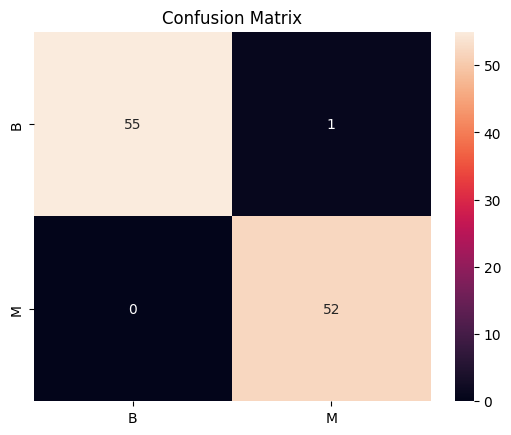

In [179]:
import seaborn as sn
# getting the confusion matrix metrics 
cm = metrics.confusion_matrix(y_test, prediction)
print('          ===> (M = malignant (1), B = benign (0)) <=== ')
sn.heatmap(cm, xticklabels=['B','M' ], yticklabels=['B', 'M'], annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

### ADYSN

In [180]:
adysn = ADASYN()
ad_x, ad_y = adysn.fit_resample(x_scalled, y_encode)
print(f' Class M(0) = : {len(ad_x[ad_x == 0])}')
print(f' Class B(1) = : {len(ad_x[ad_x == 1])}')

 Class M(0) = : 719
 Class B(1) = : 719


In [181]:
X_train , X_test , y_train , y_test = \
model_selection.train_test_split(ad_x , ad_y,  test_size=.15) 

In [182]:
# initializing random forest.... 
random_forest = ensemble.RandomForestClassifier()
# training model using training dataset
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [183]:

# make prediction for 
prediction = random_forest.predict(X_test)
# accuracy score metrics
acc_score = metrics.accuracy_score(y_test, prediction)
print(f'Random Forest Accuracy  Score : {acc_score}')
# precision score metrics
pre_score = metrics.precision_score(y_test, prediction)
print(f'Random Forest Precision  Score : {pre_score}')
# recall score metrics
re_score = metrics.recall_score(y_test, prediction)
print(f'Random Forest Recall  Score : {re_score}')
# F1 score metrics
f1_score = metrics.f1_score(y_test, prediction)
print(f'Random Forest F1  Score : {f1_score}')

Random Forest Accuracy  Score : 1.0
Random Forest Precision  Score : 1.0
Random Forest Recall  Score : 1.0
Random Forest F1  Score : 1.0


In [184]:
# classification report
class_report = metrics.classification_report(y_test, prediction)

print('     ======== RANDOM FOREST CLASSIFICATION REPORT =========')
print()
print(class_report)

     ======== RANDOM FOREST CLASSIFICATION REPORT =========

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        67

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108



          ===> (M = malignant (1), B = benign (0)) <=== 


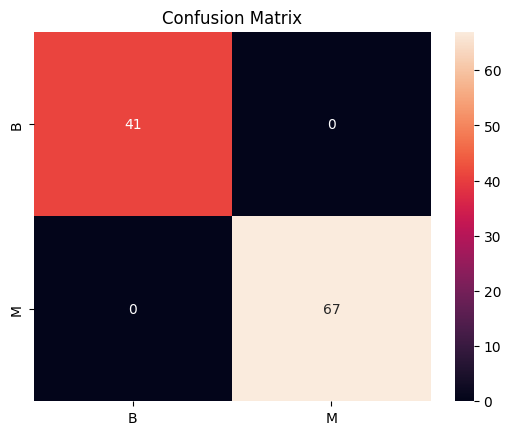

In [185]:
import seaborn as sn
# getting the confusion matrix metrics 
cm = metrics.confusion_matrix(y_test, prediction)
print('          ===> (M = malignant (1), B = benign (0)) <=== ')
sn.heatmap(cm, xticklabels=['B','M' ], yticklabels=['B', 'M'], annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

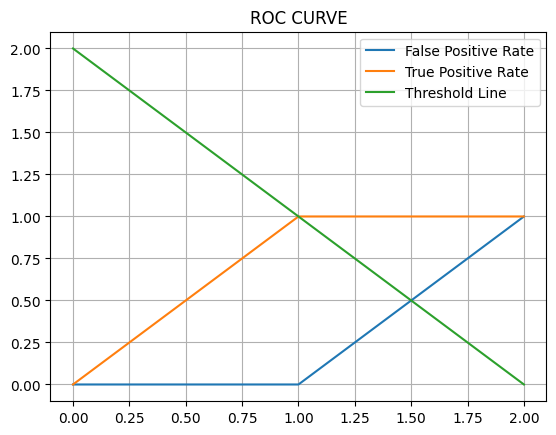

In [186]:
fpr, tpr, threshold = metrics.roc_curve(y_test, prediction)
plt.plot(fpr, label='False Positive Rate')
plt.plot(tpr , label='True Positive Rate')
plt.plot(threshold, label='Threshold Line')
plt.title('ROC CURVE')
plt.grid()
plt.legend()
plt.show()

### SVM SMOTE

In [187]:
svm_smote = SVMSMOTE()
ad_x, ad_y = svm_smote.fit_resample(x_scalled, y_encode)
print(f' Class M(0) = : {len(ad_x[ad_x == 0])}')
print(f' Class B(1) = : {len(ad_x[ad_x == 1])}')

 Class M(0) = : 714
 Class B(1) = : 714


In [188]:
X_train , X_test , y_train , y_test = \
model_selection.train_test_split(ad_x , ad_y,  test_size=.15) 

In [189]:
# initializing random forest.... 
random_forest = ensemble.RandomForestClassifier()
# training model using training dataset
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [190]:
# make prediction for 
prediction = random_forest.predict(X_test)
# accuracy score metrics
acc_score = metrics.accuracy_score(y_test, prediction)
print(f'Random Forest Accuracy  Score : {acc_score}')
# precision score metrics
pre_score = metrics.precision_score(y_test, prediction)
print(f'Random Forest Precision  Score : {pre_score}')
# recall score metrics
re_score = metrics.recall_score(y_test, prediction)
print(f'Random Forest Recall  Score : {re_score}')
# F1 score metrics
f1_score = metrics.f1_score(y_test, prediction)
print(f'Random Forest F1  Score : {f1_score}')

Random Forest Accuracy  Score : 0.9722222222222222
Random Forest Precision  Score : 0.9545454545454546
Random Forest Recall  Score : 0.9767441860465116
Random Forest F1  Score : 0.9655172413793104


In [191]:
# classification report
class_report = metrics.classification_report(y_test, prediction)

print('     ======== RANDOM FOREST CLASSIFICATION REPORT =========')
print()
print(class_report)

     ======== RANDOM FOREST CLASSIFICATION REPORT =========

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        65
           1       0.95      0.98      0.97        43

    accuracy                           0.97       108
   macro avg       0.97      0.97      0.97       108
weighted avg       0.97      0.97      0.97       108



          ===> (M = malignant (1), B = benign (0)) <=== 


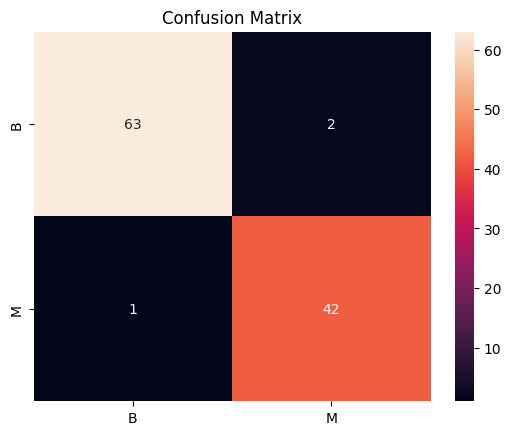

In [192]:
import seaborn as sn
# getting the confusion matrix metrics 
cm = metrics.confusion_matrix(y_test, prediction)
print('          ===> (M = malignant (1), B = benign (0)) <=== ')
sn.heatmap(cm, xticklabels=['B','M' ], yticklabels=['B', 'M'], annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

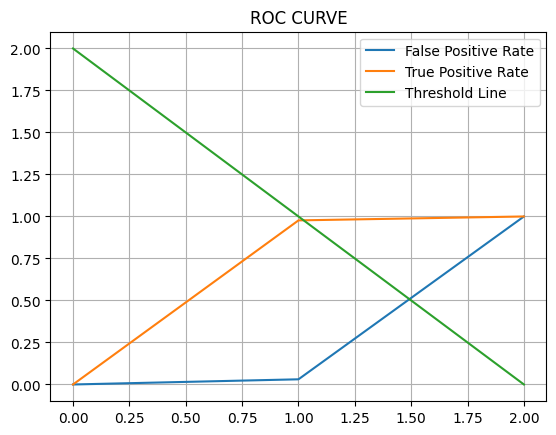

In [193]:
fpr, tpr, threshold = metrics.roc_curve(y_test, prediction)
plt.plot(fpr, label='False Positive Rate')
plt.plot(tpr , label='True Positive Rate')
plt.plot(threshold, label='Threshold Line')
plt.title('ROC CURVE')
plt.grid()
plt.legend()
plt.show()